# Оценка качества классификации

Оценка качества классификации, хоть и кажется простой задачей, имеет свои "подвохи".

## Очевидное решение

Самое просто решение, которое может прийти в голову - оценивать число верных ответов, то есть "правильных" классификаций. Такая метрика называется "точностью", а на сленге - "аккуратностью". Откуда возникло второе название вы сможете узнать чуть позже.

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

Тем не менее, такая метрика имеет некоторые недостатки, котороые хорошо заметны на несбалансированных выборках, то есть на таких выборках, в которых число объектов одного класса значительно больше, чем число объектов другого класса.

Например, предположим, что у вас в выборке 10000 объектов. Объектов, которые можно отнести к первому классу 99900. Объектов, которые можно отнести ко второму классу - 100. Пусть функция классификации относит все объекты к первому классу. Тогда очевидно, что тоность составит 0.999. Хотя на практике, такой классификатор не верно идентифицирует _каждый_ объект второго класса.


## Матрица ошибок (confusion matrix)

Матрица ошибок - классический способ представления результатов работы классификатора, особенно, бинарного классификатора. Матрица ошибок составляется следующим образом:

|  <empty>   | $$y = 1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a(x) = 1$$__  |   TP    |   FP   |
| __$$a(x) = -1$$__ |   FN    |   TN   |

По горизонтали откладывается истинное значение класса объекта. По вертикали результат работы модели. На пересечении получается набор вариантов срабатывания, которые сейчас обозначены классическими для компьютерных наук терминами:

*   TP - истинно-положительное или истинно-верное срабатывание. "Положительный" объект был отнесён к "положительному" классу.
*   FP - ложно-положительное срабатывание. "Отрицательный" объект был отнесён к "положительному" классу.
*   FN - ложно-отрицательное срабатывание. "Положительный" объект был отнесён к "отрицательному" классу.
*   TN - истинно-отрицательное срабатывание. "Отрицательный" объект был отнесён к "отрицательному" классу.

Исходя из этой матрицы можно выделить два разных типа ошибок.

Исходя из этого, можно по-другому рассчитать "аккуратность":

$$accuracy(a,x) = \frac{TP+TN}{TP+TN+FP+FN} $$

Так как сумма в знаменателе всегда больше или равна нулю, а числитель не может быть меньше знаменателя, то значения метрики находится интервале от 0 до 1.



## Точность и полнота

Исходя из того, что ошибки могут быть двух типов (в случае бинарной классификации), а также с допущением, что мы выбираем* "положительный" класс для расчёта характеристик можно ввести две метрики,

Точность (precision) представляет из себя долю истинных срабатываний от общего количества срабатываний. Она показывает, насколько можно доверять алгоритму классификации в случае срабатывания

$$precision(a, X) = \frac{TP}{TP+FP}.$$

Полнота (recall) считается как доля объектов, истинно относящихся к классу "+1", которые алгоритм отнес к этому классу

$$recall(a, X) = \frac{TP}{TP+FN}.$$

*исходя из этого важного отметить, что приведённые в этом разделе оценки зависят от "точки отсчёта", то есть от того, какой класс выбран в качестве основного для расчёта метрики.

**именно по-этому для той "точности", которую мы обсуждали ранее, и появилось сленговое название "аккуратность".

### Пример

Пусть у нас есть выборка из 100 объектов, из которых 50 относится к классу "+1" и 50 к классу "-1" и для этой работы с этой выборкой мы рассматриваем две модели: $a_{1}(x)$ с матрицей ошибок

|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a_{1}(x) = +1$$__  |   5    |   5   |
| __$$a_{1}(x) = -1$$__ |   5    |   5   |
    

и $a_{2}(x)$ с матрицей ошибок:


|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a_{2}(x) = +1$$__  |   12    |   8   |
| __$$a_{2}(x) = -1$$__ |   20    |   60   |

Рассчитаем значения всех ключевых харатеристик:

Для первого алгоритма

$$preсision(a_{1}, X)=P=0.8$$
$$recall(a_{1}, X)=R=0.8$$
$$accuracy(a_{1}, X) = A = 0.9$$

Для второго алгоритма

$$P(a_{2}, X)=0.6$$
$$R(a_{2}, X)=0.375$$
$$A(a_{2}, X)=0.72$$

Полнота и точность - разные характеристики, каждая из которых может требоваться при решении разных задач.
Например - максимизация полноты необходима в задаче интерскопического распознавания объектов (поиск опасных объектов при досмотре в аэропорту и прочее): каждый пропущенный объект будет стоить жизни, а каждый ложно найденный объект можно перепропрверить "руками" и "глазами".



## F-мера

Часто точность и полноту необходимо рассматривать в совокупности друг с другом. Наиболее часто используемой с такой целью метрикой является _F-мера_, которая представляет собой среднее гармоническое между точностью и полнотой

$$F = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$


In [1]:
import matplotlib.pyplot as plt
import numpy as np

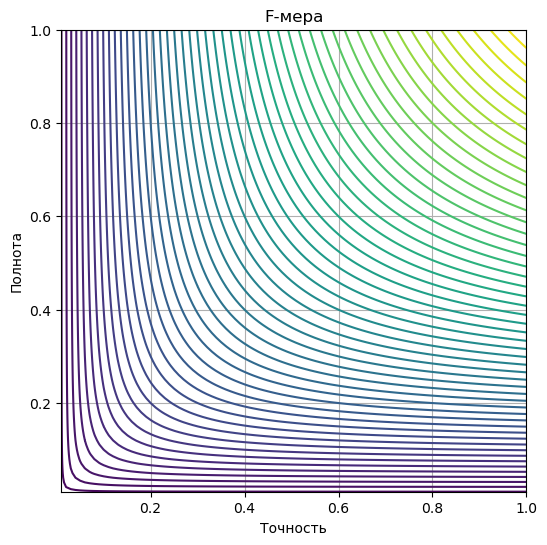

In [2]:
A, B = np.meshgrid(np.linspace(0.01, 1, 100), np.linspace(0.01, 1, 100))

f_levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        f_levels[i, j] = 2 * A[i, j] * B[i, j] / (A[i, j] + B[i, j])
        #f_levels[i, j] = A[i, j] + B[i, j]

plt.figure(figsize=(6, 6))
plt.title('F-мера')
plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.grid()
plt.contour(A, B, f_levels, levels=50)
plt.show()